# Load dataset

## Initialize dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Need to manually upload dataset for now (Click on the folder icon on the right > right click > select "upload")
# TODO: Set up download automatically
df = pd.read_csv("./weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Analysis

## Dataset Balance

<Axes: ylabel='RainTomorrow'>

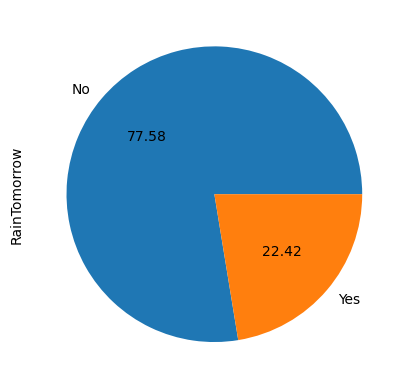

In [2]:
df['RainTomorrow'].value_counts().plot.pie(autopct='%.2f')

# Preprocess

In [3]:
# Remove records with no value for target attribute
df.dropna(subset=['RainTomorrow'], inplace=True)

In [4]:
# Drop date column. May test with or without
df.drop("Date", axis="columns", inplace=True)

## Data imputation

In [5]:
df.isna().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [6]:
# Replace NaNs with the median for numerical features
df.fillna({"MinTemp": df["MinTemp"].median()}, inplace=True)
df.fillna({"MaxTemp": df["MaxTemp"].median()}, inplace=True)
df.fillna({"Rainfall": df["Rainfall"].median()}, inplace=True)
df.fillna({"Evaporation": df["Evaporation"].median()}, inplace=True)
df.fillna({"Sunshine": df["Sunshine"].median()}, inplace=True)
df.fillna({"WindGustSpeed": df["WindGustSpeed"].median()}, inplace=True)
df.fillna({"WindSpeed9am": df["WindSpeed9am"].median()}, inplace=True)
df.fillna({"WindSpeed3pm": df["WindSpeed3pm"].median()}, inplace=True)
df.fillna({"Humidity9am": df["Humidity9am"].median()}, inplace=True)
df.fillna({"Humidity3pm": df["Humidity3pm"].median()}, inplace=True)
df.fillna({"Pressure9am": df["Pressure9am"].median()}, inplace=True)
df.fillna({"Pressure3pm": df["Pressure3pm"].median()}, inplace=True)
df.fillna({"Cloud9am": df["Cloud9am"].median()}, inplace=True)
df.fillna({"Cloud3pm": df["Cloud3pm"].median()}, inplace=True)
df.fillna({"Temp9am": df["Temp9am"].median()}, inplace=True)
df.fillna({"Temp3pm": df["Temp3pm"].median()}, inplace=True)


# Replace NaNs with mode for categorical features
df.fillna({"WindGustDir": df["WindGustDir"].mode()[0]}, inplace=True)
df.fillna({"WindDir9am": df["WindDir9am"].mode()[0]}, inplace=True)
df.fillna({"WindDir3pm": df["WindDir3pm"].mode()[0]}, inplace=True)
df.fillna({"RainToday": df["RainToday"].mode()[0]}, inplace=True)

df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

## Label enconding

In [7]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
ohe_cols = enc.fit_transform(df[["Location", "WindGustDir", "WindDir9am", "WindDir3pm", 'RainToday']])
ohe_cols

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [8]:
# Concat one-hot encoded columns
df = pd.concat([df, ohe_cols], axis=1)

# Drop redundant columns
df = df.drop(["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday"], axis=1)

df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,4.8,8.5,31.0,15.0,13.0,59.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145455,2.8,23.4,0.0,4.8,8.5,31.0,13.0,11.0,51.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145456,3.6,25.3,0.0,4.8,8.5,22.0,13.0,9.0,56.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145457,5.4,26.9,0.0,4.8,8.5,37.0,9.0,9.0,53.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [9]:
df['RainTomorrow'] = df['RainTomorrow'].replace(to_replace='No', value=0)
df['RainTomorrow'] = df['RainTomorrow'].replace(to_replace='Yes', value=1)

## Train test split

In [10]:
y = df['RainTomorrow']
X = df.drop(['RainTomorrow'], axis=1)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.2, random_state=1, stratify=y)

## SMOTE

<Axes: ylabel='RainTomorrow'>

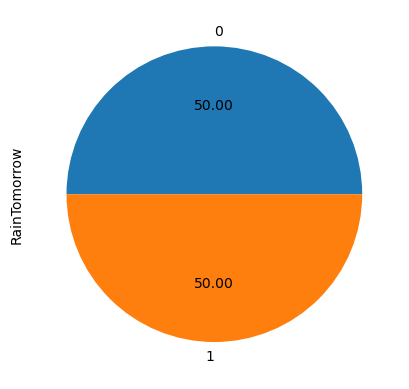

In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
y_train_res.value_counts().plot.pie(autopct='%.2f')

## Scale

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_res)

# This should be just transform and only on the original X_test (not resampled)
X_test_scaled = scaler.transform(X_test)

# Training and Predictions



In [14]:
import multiprocessing

# Used for n_jobs in the GridSearchCV. Manually change n_cpus as needed.
n_cpus = multiprocessing.cpu_count()

## SVC

### Hyperparameter Tuning

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

execute_cell = True

if execute_cell:
  # For sake of speed, opting not the include linear kernel. Takes hours...
  parameters = {'C': [0.5, 1, 5, 10]}
  svc = SVC(kernel='rbf', random_state=0)

  clf = GridSearchCV(svc, parameters, n_jobs=n_cpus)
  clf.fit(X_train_scaled, y_train_res)

  results_df = pd.DataFrame(clf.cv_results_)

  results_df = results_df.sort_values(by=["rank_test_score"])
  results_df = results_df.set_index(results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))).rename_axis("name")
  display(results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]])

,params,rank_test_score,mean_test_score,std_test_score
name,,,,
5,{'C': 5},1,0.887145,0.076188
10,{'C': 10},2,0.886283,0.074386
1,{'C': 1},3,0.879961,0.084201
0.5,{'C': 0.5},4,0.873480,0.086875


### Train

In [19]:
from sklearn.svm import SVC

svc = SVC(C=5, kernel='rbf', probability=True, random_state=0)

svc.fit(X_train_scaled, y_train_res)



SVC(C=5, probability=True, random_state=0)

### Evaluate

In [ ]:
svc_y_pred_prob = svc.predict_proba(X_test_scaled)[:,1]
svc_y_pred = svc.predict(X_test_scaled)

#### Accuracy and Classification Report

In [18]:
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy score:', accuracy_score(y_test, svc_y_pred))

print('Classifcation report:')
print(classification_report(y_test, svc_y_pred, digits=4))

Accuracy score: 0.8367983824886818
Classifcation report:
              precision    recall  f1-score   support

           0     0.8811    0.9128    0.8967     88253
           1     0.6553    0.5739    0.6119     25502

    accuracy                         0.8368    113755
   macro avg     0.7682    0.7433    0.7543    113755
weighted avg     0.8305    0.8368    0.8328    113755



#### Confusion Matrix

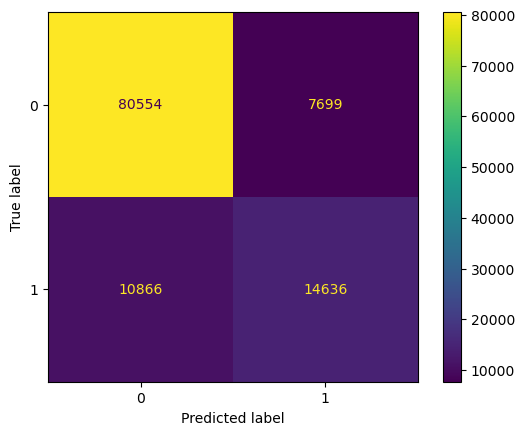

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmat = confusion_matrix(y_test, svc_y_pred)

cmatDisplay = ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=svc.classes_)

cmatDisplay.plot()
plt.show()

#### ROC

ROC_AUC: 0.8579831952913146


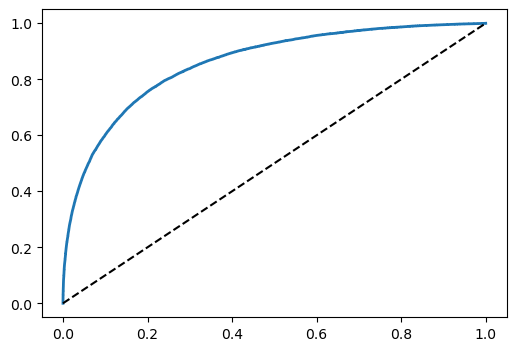

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

### May not be accurate as the probability model is created using cross validation.

fpr, tpr, thresholds = roc_curve(y_test, svc_y_pred_prob, pos_label=1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

print('ROC_AUC:', roc_auc_score(y_test, svc_y_pred_prob))

## Random Forest

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

execute_cell = True

if execute_cell:
  parameters = {'criterion': ['gini', 'entropy'], 'n_estimators': [100, 200, 300]}
  random_forest = RandomForestClassifier(random_state=0)

  clf = GridSearchCV(random_forest, parameters, n_jobs=n_cpus)

  clf.fit(X_train_scaled, y_train_res)

  results_df = pd.DataFrame(clf.cv_results_)

  results_df = results_df.sort_values(by=["rank_test_score"])
  results_df = results_df.set_index(results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))).rename_axis("name")
  display(results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]])

### Training

In [1]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=300, criterion='entropy', random_state=0)
random_forest.fit(X_train_scaled, y_train_res)

NameError: name 'X_train_scaled' is not defined

### Evaluation

In [23]:
random_forest_y_pred_prob = random_forest.predict_proba(X_test_scaled)[:,1]
random_forest_y_pred = random_forest.predict(X_test_scaled)

#### Accuracy and Classification Report

In [24]:
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy score:', accuracy_score(y_test, random_forest_y_pred))

print('Classifcation report:')
print(classification_report(y_test, random_forest_y_pred, digits=4))

Accuracy score: 0.8480857984264428
Classifcation report:
              precision    recall  f1-score   support

           0     0.8794    0.9321    0.9049     88253
           1     0.7034    0.5575    0.6220     25502

    accuracy                         0.8481    113755
   macro avg     0.7914    0.7448    0.7635    113755
weighted avg     0.8399    0.8481    0.8415    113755



#### Confusion matrix

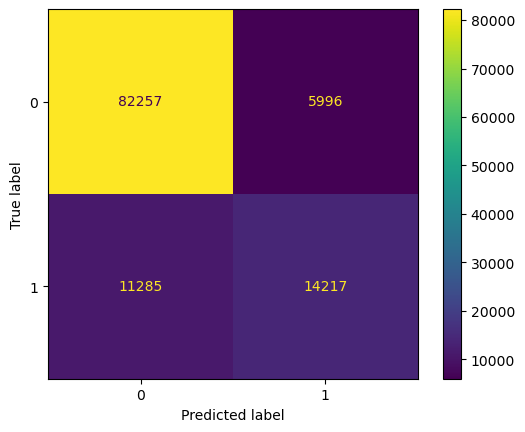

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmat = confusion_matrix(y_test, random_forest_y_pred)

cmatDisplay = ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=random_forest.classes_)

cmatDisplay.plot()
plt.show()

#### ROC

ROC_AUC: 0.8759473619115712


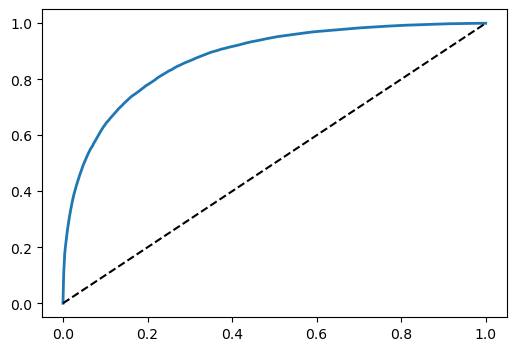

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, random_forest_y_pred_prob, pos_label=1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

print('ROC_AUC:', roc_auc_score(y_test, random_forest_y_pred_prob))

## AdaBoost

### Hyperparameter Tuning

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

execute_cell = True

if execute_cell:
  parameters = {'learning_rate': [0.5, 1, 1.5, 2, 5], 'n_estimators': [100, 200, 300]}
  adaboost = AdaBoostClassifier(algorithm='SAMME', random_state=0)

  clf = GridSearchCV(adaboost, parameters, n_jobs=n_cpus)

  clf.fit(X_train_scaled, y_train_res)

  results_df = pd.DataFrame(clf.cv_results_)

  results_df = results_df.sort_values(by=["rank_test_score"])
  results_df = results_df.set_index(results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))).rename_axis("name")
  display(results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]])

,params,rank_test_score,mean_test_score,std_test_score
name,,,,
1.5_300,"{'learning_rate': 1.5, 'n_estimators': 300}",1,0.872279,0.100002
1.5_200,"{'learning_rate': 1.5, 'n_estimators': 200}",2,0.866522,0.087608
1_300,"{'learning_rate': 1, 'n_estimators': 300}",3,0.855485,0.072215
1.5_100,"{'learning_rate': 1.5, 'n_estimators': 100}",4,0.851270,0.071422
1_200,"{'learning_rate': 1, 'n_estimators': 200}",5,0.845604,0.059437
1_100,"{'learning_rate': 1, 'n_estimators': 100}",6,0.829921,0.049759
0.5_300,"{'learning_rate': 0.5, 'n_estimators': 300}",7,0.827926,0.042544
0.5_200,"{'learning_rate': 0.5, 'n_estimators': 200}",8,0.820946,0.037309
0.5_100,"{'learning_rate': 0.5, 'n_estimators': 100}",9,0.809615,0.032171


### Training

In [28]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(learning_rate=1.5, n_estimators=300, algorithm='SAMME', random_state=0)
adaboost.fit(X_train_scaled, y_train_res)

AdaBoostClassifier(algorithm='SAMME', learning_rate=1.5, n_estimators=300,
                   random_state=0)

### Evaluation

In [29]:
adaboost_y_pred_prob = adaboost.predict_proba(X_test_scaled)[:,1]
adaboost_y_pred = adaboost.predict(X_test_scaled)

#### Accuracy and Classification Report

In [30]:
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy score:', accuracy_score(y_test, adaboost_y_pred))

print('Classifcation report:')
print(classification_report(y_test, adaboost_y_pred, digits=4))

Accuracy score: 0.8368687090677333
Classifcation report:
              precision    recall  f1-score   support

           0     0.8811    0.9129    0.8967     88253
           1     0.6556    0.5738    0.6120     25502

    accuracy                         0.8369    113755
   macro avg     0.7683    0.7434    0.7544    113755
weighted avg     0.8306    0.8369    0.8329    113755



#### Confusion matrix

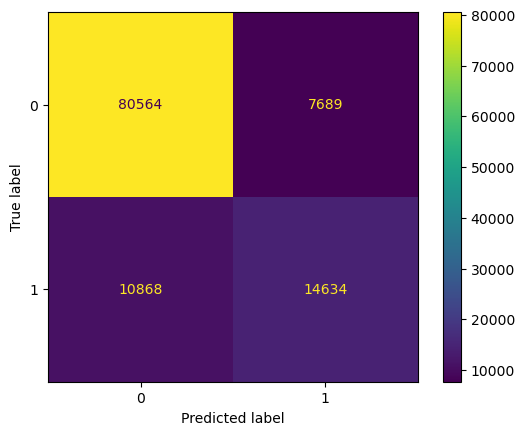

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmat = confusion_matrix(y_test, adaboost_y_pred)

cmatDisplay = ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=adaboost.classes_)

cmatDisplay.plot()
plt.show()

#### ROC

ROC_AUC: 0.8612458655239892


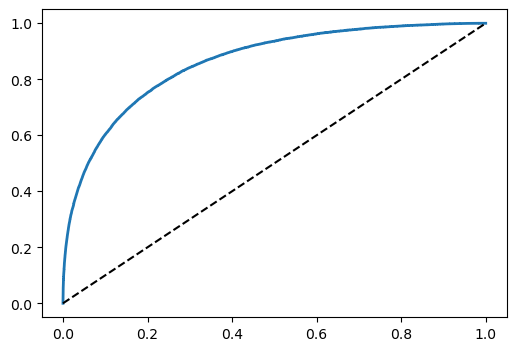

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, adaboost_y_pred_prob, pos_label=1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

print('ROC_AUC:', roc_auc_score(y_test, adaboost_y_pred_prob))

## Gradient Boosting

### Hyperparameter Tuning

In [18]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

execute_cell = True

if execute_cell:
  parameters = {'learning_rate': [0.01, 0.1], 'n_estimators': [100, 300, 500, 1000], 'max_depth': [3, 5, 7]}
  xgboost = xgb.XGBClassifier(objective='binary:logistic', random_state=0)

  clf = GridSearchCV(xgboost, parameters, n_jobs=n_cpus)

  clf.fit(X_train_scaled, y_train_res)

  results_df = pd.DataFrame(clf.cv_results_)

  results_df = results_df.sort_values(by=["rank_test_score"])
  results_df = results_df.set_index(results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))).rename_axis("name")
  display(results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]])

/Users/aurelsahiti/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


,params,rank_test_score,mean_test_score,std_test_score
name,,,,
0.1_7_300,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",1,0.887826,0.104705
0.1_7_500,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",2,0.887531,0.103650
0.1_7_1000,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",3,0.886897,0.103813
0.1_5_1000,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",4,0.886557,0.105423
0.1_5_500,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",5,0.886217,0.107191
0.1_3_1000,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",6,0.885446,0.108919
0.1_5_300,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",7,0.885310,0.107665
0.1_7_100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",8,0.884540,0.101889
0.01_7_1000,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",9,0.884222,0.102714


### Training

In [19]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgboost = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=1000, subsample = 0.8, colsample_bytree = 0.9, reg_alpha = 0.1, reg_lambda = 0.1, objective='binary:logistic', random_state=0)
xgboost.fit(X_train_scaled, y_train_res)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

### Evaluation

In [20]:
xgboost_y_pred_prob = xgboost.predict_proba(X_test_scaled)[:,1]
xgboost_y_pred = xgboost.predict(X_test_scaled)

#### Accuracy and Classification Report

In [21]:
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy score:', accuracy_score(y_test, xgboost_y_pred))

print('Classifcation report:')
print(classification_report(y_test, xgboost_y_pred, digits=4))

Accuracy score: 0.8558744670563931
Classifcation report:
              precision    recall  f1-score   support

           0     0.8813    0.9410    0.9102     88253
           1     0.7332    0.5614    0.6359     25502

    accuracy                         0.8559    113755
   macro avg     0.8072    0.7512    0.7730    113755
weighted avg     0.8481    0.8559    0.8487    113755



#### Confusion matrix

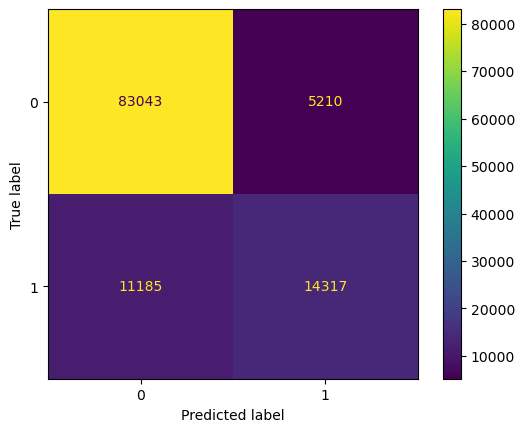

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmat = confusion_matrix(y_test, xgboost_y_pred)

cmatDisplay = ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=xgboost.classes_)

cmatDisplay.plot()
plt.show()

#### ROC

ROC_AUC: 0.8843670016518936


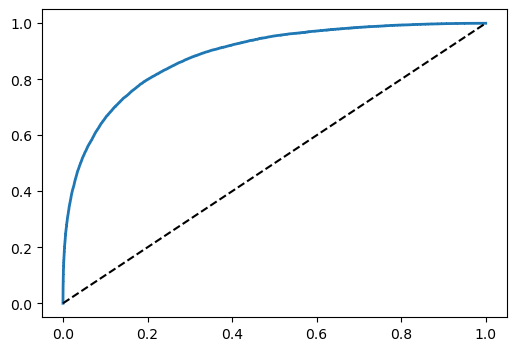

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, xgboost_y_pred_prob, pos_label=1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

print('ROC_AUC:', roc_auc_score(y_test, xgboost_y_pred_prob))